In [1]:
# import and setup

import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Add parent directory to path so algorithms can be imported
sys.path.append(os.path.abspath("../algorithms"))

# Import algorithms
#from greedy import greedy_clique
#from local_search import local_search
from randomized import randomized_max_clique
#from simulated_annealing import simulated_annealing
#from bron_kerbosch import bron_kerbosch

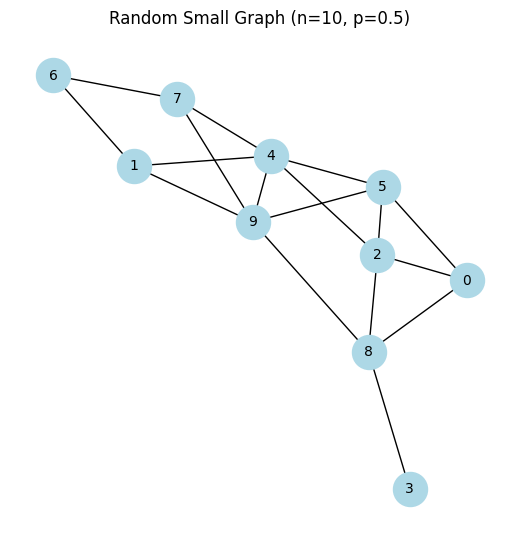

In [2]:
# generate small graphs

def generate_random_graph(num_nodes=10, edge_prob=0.4):
    """
    Generates a random undirected graph using Erdos–Renyi model.
    """
    G = nx.erdos_renyi_graph(num_nodes, edge_prob)
    return G

# Example: generate one small graph
G = generate_random_graph(num_nodes=10, edge_prob=0.5)

# Visualize it
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=600, font_size=10)
plt.title("Random Small Graph (n=10, p=0.5)")
plt.show()

In [ ]:
# Greedy

In [ ]:
# Local search

Randomized Heuristic:
  Clique size  = 9
  Clique nodes = 4
  Runtime      = 0.0002 sec


TypeError: object of type 'int' has no len()

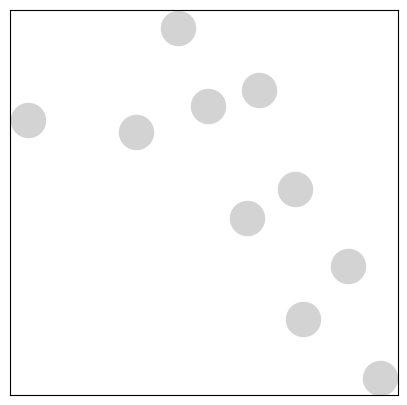

In [3]:
# --- Run Randomized Heuristic Algorithm ---
start = time.time()
size, clique, _ = randomized_max_clique(G, restarts=10)
end = time.time()

print(f"Randomized Heuristic:")
print(f"  Clique size  = {size}")
print(f"  Clique nodes = {clique}")
print(f"  Runtime      = {end - start:.4f} sec")

# --- Visualization of Clique in Graph ---
# Highlight the found clique in red
pos = nx.spring_layout(G, seed=42)  # fixed layout for consistency

plt.figure(figsize=(5,5))
# draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
# highlight clique nodes
nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color='tomato', node_size=700)
# draw edges
nx.draw_networkx_edges(G, pos)
# labels
nx.draw_networkx_labels(G, pos, font_color='black')

plt.title(f"Randomized Heuristic Clique (size = {size})")
plt.axis('off')
plt.show()


In [ ]:
#local random


In [ ]:
# bron kerbosch